# 2.  Adversarial attacks in Neural Networks

## 2.2. Dataset

In this section we will import the <b>MNIST</b> dataset, split it into train and test sets, and report the size of each set, plus the dimension of each image.

We have used the ```tensorflow.keras.datasets.mnist``` class to import the dataset.

In [36]:
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In the following, we report the size of train and test sets. Also, we print the size of each image in dataset.

In [37]:
# Display dataset information
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


As it is obvious from the above output, there are $60000$ images in train set which we will use to train our fully connected model. Also, there are $10000$ images in test set which we will test our model with them.

Dimention of all images in MNIST dataset is $(28, 28)$ whcih means that each image in the dataset is represented by $784$ pixels gathered in a square.

And about the labels, there is one label for each image in the dataset which represented the true class that the image belongs to; $60000$ labels in train set and $10000$ labels in test set.
<hr>

In the following we want to show a random image of each class.

To do this, we need to use the below libraries:
<ul>
  <li>numpy: A library used for working with arrays. In this section we use it to find unique labels in the set of train labels. We could use number_of_classes = np.arange(0, 10, 1) too.</li>
  <li>random: A module that generates random numbers in Python. We used it to choose some random images from train set.</li>
  <li>matplotlib: A comprehensive library for creating static, animated, and interactive visualizations in Python. We will use it in this project a lot to plot out images.</li>
</ul>

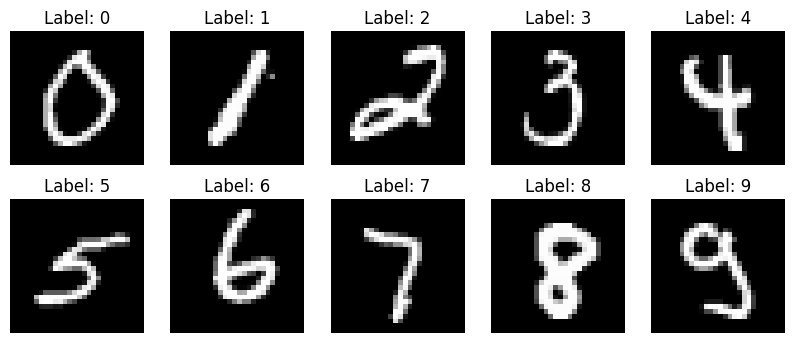

In [38]:
# import numpy, random, and matplotlib libraries
import numpy as np
import random
import matplotlib.pyplot as plt


# Find all possible labels in dataset
number_of_classes = len(np.unique(train_labels))

# Define seed to output same images in different runs
random.seed(313)

# Define a list to store random images of each class
random_images = []

# Show a random image of each class
for i in range(number_of_classes):
  # Extract all images of the class i
  samples = [train_images[j] for j in range(train_images.shape[0]) if train_labels[j] == i]
  # choose a random element of the ith class
  sample = random.choice(samples)
  # Append the chosen image to the list
  random_images.append(sample)

# Plot the chosen random images using matplotlib
plt.figure(figsize=(10, 4))
for i, image in enumerate(random_images):
    plt.subplot(2, len(random_images)//2, i + 1)
    # Show the image
    plt.imshow(image, cmap='gray')
    # Set image label
    plt.title(f"Label: {i}")
    plt.axis('off')
plt.show()

### Distribution of data
In the following cell, we try to plot the distribution of the classes in train and test sets and compare them.


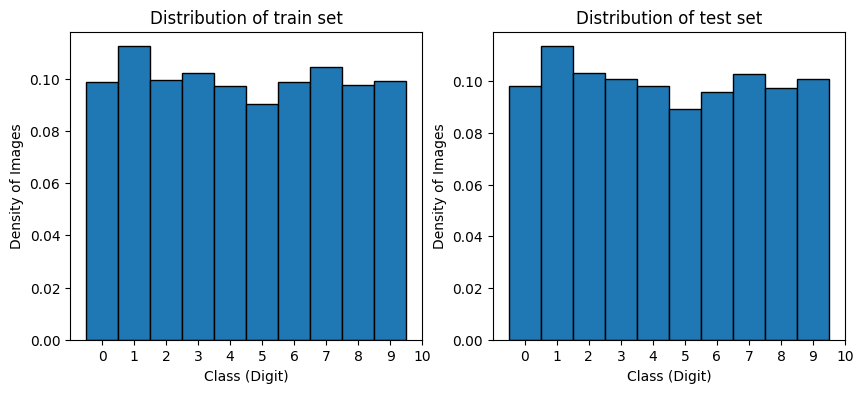

In [60]:
# Set bins for histograms
bins = range(11)

# Define a figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
# Plot the histogram corresponding to train set
axes[0].hist(train_labels, bins=bins, edgecolor='black', align='left', density='True')
axes[0].set_xlabel('Class (Digit)')
axes[0].set_ylabel('Density of Images')
axes[0].set_title('Distribution of train set')
axes[0].set_xticks(bins)

# Plot the histogram corresponding to test set
axes[1].hist(test_labels, bins=bins, edgecolor='black', align='left', density='True')
axes[1].set_xlabel('Class (Digit)')
axes[1].set_ylabel('Density of Images')
axes[1].set_title('Distribution of test set')
axes[1].set_xticks(bins)

plt.show()

We used `plt.hist()` to draw a histogram of labels in train and test sets.

As we can see, the distribution of classes in both train and test sets are almost the same, so there is no need to balance the data.

### Data scaling

The use library in this cell is:
- sklean: A machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction. We use the `MinMaxScaler` function of the `preprocessing` section of it to normalize our data.

As we know, `train_images` has the shpe (60000, 28, 28). Also, as the MinMaxScaler only accpets inputs of dimension 2, we have to reshape the `train_images` such that represent all images as a row with 784 pixels, not a $28 \times 28$ square.

The, we start to normalize the images:

We use `MinMaxScaler.fit_transform()` and `MinMaxScaler.transform()` to scale the columns related to the pixels in range [0, 1] using min-max normalization.

- `MinMaxScaler.fit_transform()`: It is used to scale the train data. It fits an algorithem for scaling the data.
- `MinMaxScaler.transform()`: It is used to scale the test data. In fact, `.trasform` scale the data, as same as how it's done to train data.

In [40]:
# Import MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# reshape train and test images
'''
images' old shape was (28, 28), while
images' new shape is (784)
'''
train_images_reshaped = train_images.reshape(train_images.shape[0], -1)
test_images_reshaped  = test_images.reshape(test_images.shape[0], -1)

# Normalize the test and train images using sklearn
scaler = MinMaxScaler()
X_train = scaler.fit_transform(train_images_reshaped)
X_test  = scaler.transform(test_images_reshaped)

Now, the images' pixels content after scaling is in tha range $[0, 1]$.

**Benefits of scaling**:
- Scaling ensures that all features are treated equally during training.
- If features have different scales (some large, some small), those with larger values can overshadow others, leading to biased learning.
- Scaling makes all features have similar ranges, preventing any single feature from dominating the learning process and promoting fair training.
- Large input values can cause numerical instability in certain activation functions or loss functions.

## 2.3. Build and train model

Used libraries in this section:
- tensorflow: It is an end-to-end open source platform for machine learning. We will use this library a lot in this project. Here, we will use it to replace the labels with their one hot encoding in the dataset.

As our network is going to be fully connected, before building and training the model, we should encode train and test labels to one hot. Actually, in this section we convert all labels to their hot hot representation using to_categorical from tensorflow library.

In [41]:
# Import tensorflow
import tensorflow as tf

# Converts a class vector (integers) to binary class matrix.
y_train = tf.keras.utils.to_categorical(train_labels)
y_test  = tf.keras.utils.to_categorical(test_labels)

Now, after using `to_categorical()`, the shape of labels in train and test sets is changed. Let's see this in the following!

In [42]:
print("X_train shape: ", X_train.shape)
print("X_test shape:  ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape:  ", y_test.shape)

X_train shape:  (60000, 784)
X_test shape:   (10000, 784)
y_train shape:  (60000, 10)
y_test shape:   (10000, 10)


As it is expected, the labels are represented as a 10 digit encoding which the indec of the 1 in the representation shows the class of the corresponding image.
<hr>

Now, it's time to build our model.
Used libraries in this section:
- os: A module provides functions for interacting with the operating system. We used it in this section to check if the model exists or not.
- pandas: A Python library used for working with data sets. We used it to read the history of the model which is saved before.

### Implementing and compiling the fully connected model:

- First of all we set the seed to a number (e.g. 313).
- If the model already exists, just load the model and get the history while training.
- But, if the model doesn't exists, we define a sequential model using keras:

    1. The input layer has 784 neurons <ins>because the train images has 784 features<ins>.
    2. The second layer has 512 neurons with activation function $\textbf{ReLU}$.
    3. The third layer has 128 neurons with activation function $\textbf{ReLU}$.
    4. The fourth layer has 32 neurons with activation function $\textbf{ReLU}$.
    5. And the output layer has 10(number of classes) neurons with activation function $\textbf{SoftMax}$

Question: Why the activation of the last layer is $\textbf{SoftMax}$?

- The softmax function converts the raw output scores (also known as logits) of the network into a probability distribution over multiple classes.
- Ensuring that the sum of the probabilities across all classes equals one.
- This is useful for multi-class classification problems.
- On the other hand, $\textbf{ReLU}$ is commonly used as an activation function in hidden layers due to its simplicity, efficiency in training, and ability to alleviate the vanishing gradient problem.
- It's not typically used in the output layer for classification tasks because it doesn't produce probabilities like softmax does.

summary:
- We can see the summary of the defined model.
- Then we compile the model using $\textbf{Adam}$ optimizer.
- 6e-5 as learning rate and $\textbf{CrossEntropy}$ as the loss function.
- Then we fit the model for training data with 25 epochs and 10% of data as a validation set.
- Save the model and history.

In [43]:
import os
import pandas as pd

# Set tensor random seed on 313
tf.random.set_seed(313)

# If the model already exists
if os.path.exists('FC_model_MNIST.h5'):
    # Load the model
    FC_model = tf.keras.models.load_model('FC_model_MNIST.h5')

    print("summary of the model:\n")
    FC_model.summary()

    # Load the history
    history_df = pd.read_csv('FC_training_history.csv')

# If the model does not exists
else:
    # Define the sequential model using tensorflow (fully connected neural network)
    FC_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(512, input_shape=(784,), activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    ])

    print("summary of the model:\n")
    FC_model.summary()

    # Compile the model
    FC_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=6e-5),
                    loss=tf.keras.losses.CategoricalCrossentropy(),
                    metrics=['accuracy'])

    history = FC_model.fit(X_train, y_train, epochs=25, validation_split=0.1)
    history_df = pd.DataFrame(history.history)

    # Save the model
    history_df.to_csv('FC_training_history.csv', index=False)
    FC_model.save('FC_model_MNIST.h5')

summary of the model:

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 472042 (1.80 MB)
Trainable params: 472042 (1.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Now, we want to evaluate the built model on our test data.

Also we plot the accuracy and loss across different epochs in the following.


313/313 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9782
Test accuracy: 0.9782000184059143
Test loss: 0.07953762263059616


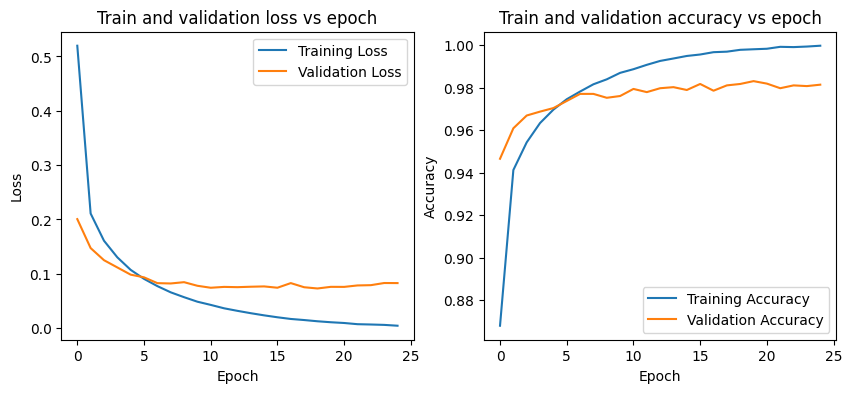

In [44]:
# Evaluate the model using test set
test_loss, test_acc = FC_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}\nTest loss: {test_loss}')

# Plot the loss and accuracy per epoch for train and validation set
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot train and validation loss across epochs
axes[0].plot(history_df['loss'], label='Training Loss')
axes[0].plot(history_df['val_loss'], label='Validation Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title("Train and validation loss vs epoch")
axes[0].legend()

# Plot train and validation accuracy across epochs
axes[1].plot(history_df['accuracy'], label='Training Accuracy')
axes[1].plot(history_df['val_accuracy'], label='Validation Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].set_title("Train and validation accuracy vs epoch")
axes[1].legend()

plt.show()

- As it is obvious, by evaluating the model with test set using `model.evaluate()`, the accuracy on test data is about 98%.
- Also, in the above plot, The loss of the training set decreases across the epochs. On the other hand, the loss of the validation set decreased only until epoch 5, after which it remained nearly constant without any further change.
- This means that probably 5 epochs were enough to train the model.

## 2.4. Implementation of FGSM attack

In this section we are going to implement FGSM(Fastest Gradient Sign Method). To do this, we do the following steps:
1. Convert the data to tensor type using `tf.convert_to_tensor()`.
2. Use `GradientTape().watch()` to record the operation for automatic differentiation.
3. Predict the labels (unormalized) of input using the model.
4. Calculate the loss of predicting compared to the ground truth labels.
5. Calculate the gradient according to the calculated loss.
6. return a small number with the same sign as the calculated gradient

In [45]:
def FGSM(model, input_image, true_label, epsilon):
  """
  Adversarial example constructor:
  model: The fully connected model
  X: The input data to the model
  y: Desired output of the model (Ground truth labels)
  epsilon: A float number determining the intensity of the attack
  """

  # Convert the data to tensor so we can use GradienTape.
  input_image = tf.convert_to_tensor(input_image)
  true_label  = tf.convert_to_tensor(true_label)

  with tf.GradientTape() as record_tape:

    # Record the operations for differentiation.
    record_tape.watch(input_image)

    # Predict the labels (unormalized) before softmax activation.
    prediction = model(input_image)

    # Calculate the loss from ground truth labels.
    loss = tf.keras.losses.CategoricalCrossentropy()(true_label, prediction)

  # Calculate the gradient wrt the input image
  gradient = record_tape.gradient(loss, input_image)

  # Calculate sign of the gradient
  sign = tf.sign(gradient)

  # return the epsilon * sign of the gradient so that the loss will be maximized.
  return epsilon * sign


### Evaluate Model Accuracy and Attack Effectiveness:

The following function is used to attack the pretrained model and check the accuracy of the model and the effectiveness of attacks. To do this job, we implement the following steps:


1. Construct the adversarial images using the `FGSM()` defined above.
2. Evaluate the model based on the adverasial images corresponding to the current epsilon
3. Predict the adversarial images and check the related accuracy.
4. Append the attack results corresponding to the chosen epsilons to `chosen_atacks` for plotting in the next section.
5. Plot the changes of model accuracy and attack effectiveness for different epsilons.
6. Return predictions of the model for different epsilons and the chosen attacks.

In [46]:
def FGSM_attack(model, test_images, test_labels, chosen_eps, epsilons=[ep for ep in np.arange(0.005, 0.5005, 0.005)]):

    # Define epty lists to store predictions, accuracies, and chosen attack results
    predictions = []
    accuracies = []
    chosen_attacks, chosen_predictions = [], []

    # Calculate the adversarial data
    for epsilon in epsilons:
        adversarial_data = tf.clip_by_value(tf.convert_to_tensor(test_images) + FGSM(model, test_images, test_labels, epsilon), 0, 1)

        print(f"Evaluating epsilon: {epsilon}")

        # Evaluate the model and store the accuracy
        acc = model.evaluate(adversarial_data, test_labels)[1]
        accuracies.append(acc)

        # Model prediction and storing the prediction results
        prediction = model.predict(adversarial_data)
        predictions.append(prediction)

        # If the current epsilon is in the list of chosen epsilons,
        # store the adversarial images and corresponding predictions
        if epsilon in chosen_eps:
            chosen_attacks.append(adversarial_data)
            chosen_predictions.append(prediction)

    # Plot the accuracy and effectiveness of attacks.
    plt.plot(epsilons, accuracies, label='Accuracy')
    plt.plot(epsilons, (test_acc - np.array(accuracies))/test_acc, label='Effectiveness')
    plt.xlabel('Epsilon')
    plt.ylabel("Accuracy and Effectiveness")
    plt.title("Accuracy and Effectiveness of attacks vs Epsilon")

    plt.legend()
    plt.show()

    return predictions, chosen_attacks

Evaluating epsilon: 0.005
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.01
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.015
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.02
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.025
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.030000000000000002
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.034999999999999996
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.04
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.045
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.049999999999999996
313/313 [==============================] - 1s 2ms/step
Evaluating epsilon: 0.055
313/313 [==============================] - 1s 3ms/step
Evaluating epsilon: 0.06
313/313 [==============================] -

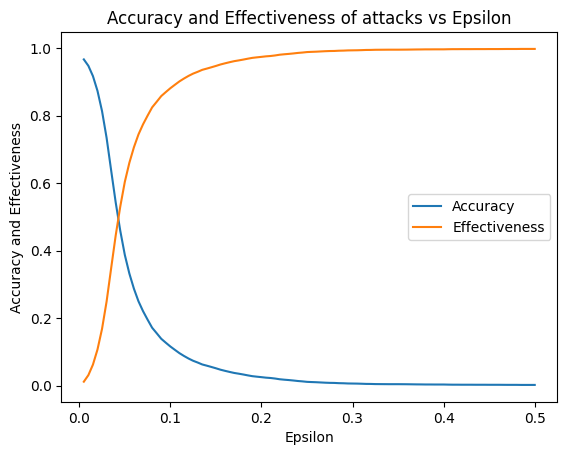

In [47]:
adversarial_predictions, chosen_attacks = FGSM_attack(FC_model, X_test, y_test, [0.025, 0.1, 0.5])

In the above plot, we considered epsilons in the range [0.005, 0.05] with a step size of 0.005. As epsilon increases, the effectiveness of the attack increases, while the accuracy of the model decreases.
<hr>


#### Original data

Now, we want to choose the first image of each class in the test set and plot the original images with their labels. In the next section, we will plot the results of the chosen attacks on these images.

313/313 [==============================] - 1s 2ms/step


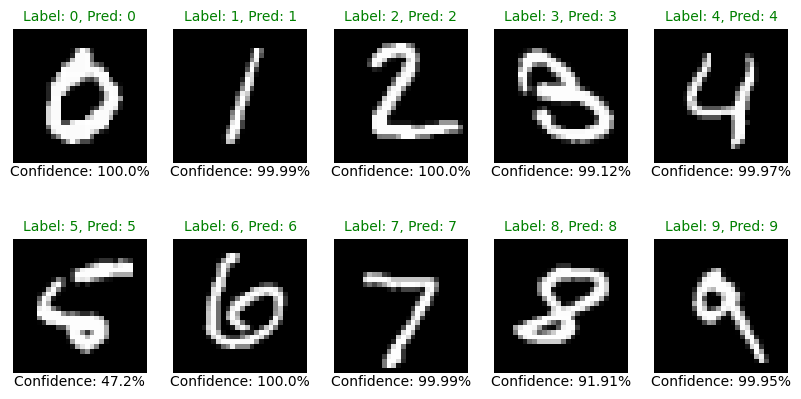

In [48]:
# Choose random seed
random.seed(313)

# Define emply lists to store chosen images and their indices
test_images = []
test_pred = []
chosen_indices = []

# Predictions on test set
test_predictions = FC_model.predict(X_test)

# Choose first image of each class and store
for i in range(number_of_classes):
  chosen_indices.append(np.where(test_labels == i)[0][0])
  sample = X_test[chosen_indices[-1]].reshape(28, 28)
  test_images.append(sample)
  test_pred.append(test_predictions[chosen_indices[-1]])

# Plot the images
plt.figure(figsize=(10, 5))
for i, image in enumerate(test_images):
    plt.subplot(2, len(test_images)//2, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {i}, Pred: {test_pred[i].argmax()}', fontsize=10,
                 color='green' if test_pred[i].argmax() == i else 'red')
    plt.text(0.5, -0.1, f'Confidence: {round(max(test_pred[i])*100, 2)}%',
            transform=plt.gca().transAxes, ha='center', fontsize=10)
    plt.axis('off')
plt.show()

#### Adversarial data
In the current section we plot the attacked images for the chosen epsilons 0.025, 0.1, 0.5.

- In the samples below we can see:
    1. The predicted labels
    2. Precentage of confidence predicting the label
    3. The epsilon
    4. Whether the predicted label is correct or not(green or red).

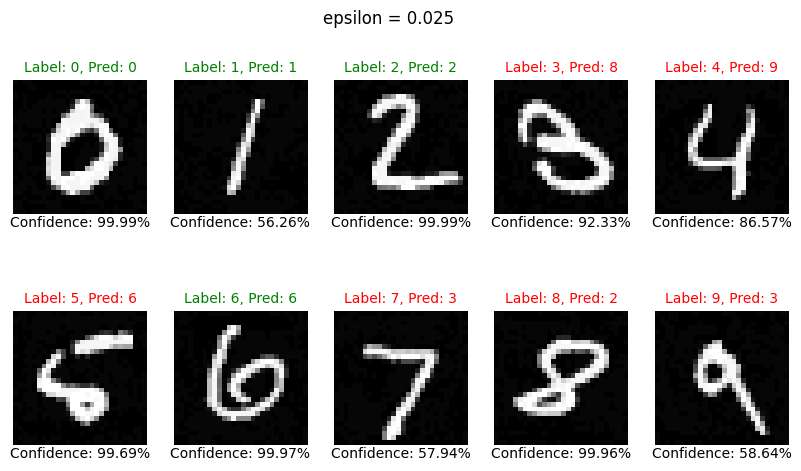

----------------------------------------------------------------------------------------------------


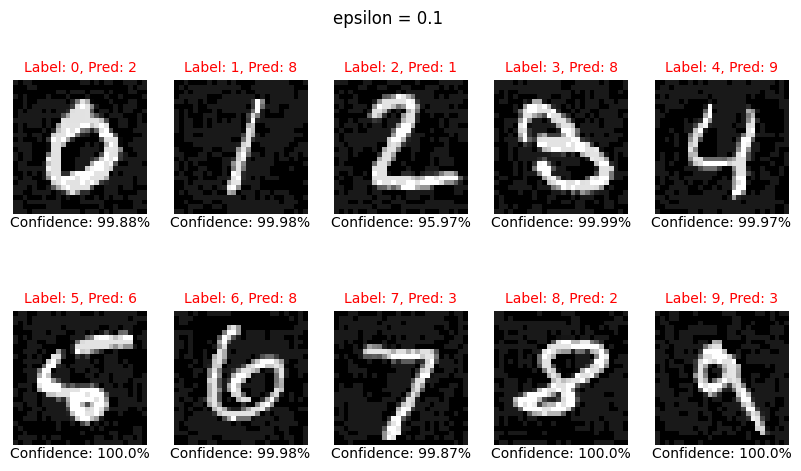

----------------------------------------------------------------------------------------------------


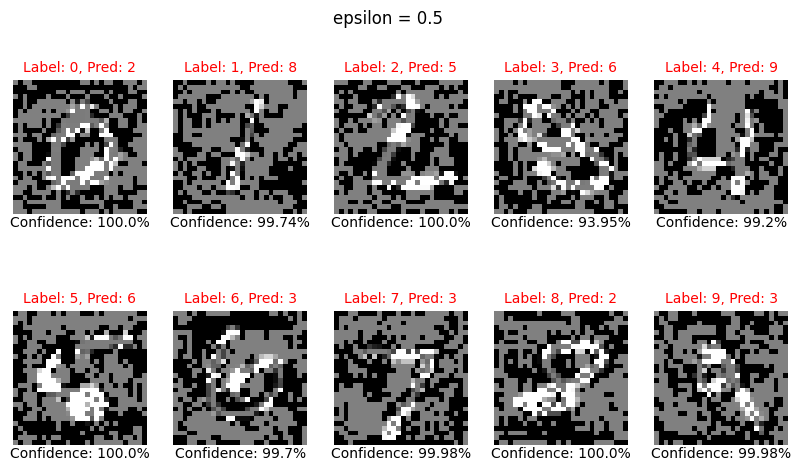

In [49]:
test_images = []

indices = [4, 19, 99]
chosen_eps = [0.025, 0.1, 0.5]
attack_ind = 0

for j in indices:

    for i in range(number_of_classes):
        sample = chosen_attacks[attack_ind][chosen_indices[i]].numpy().reshape(28, 28)
        test_images.append(sample)

    fig, axes = plt.subplots(2, len(test_images)//2, figsize=(10, 5), gridspec_kw={'hspace': 0.5})
    for i, image in enumerate(test_images):
        ax = axes[i // (len(test_images) // 2), i % (len(test_images) // 2)]
        ax.imshow(image, cmap='gray')
        ax.set_title(
            f"Label: {i}, Pred: {np.argmax(adversarial_predictions[j][chosen_indices[i]])}",
            color='green' if np.argmax(adversarial_predictions[j][chosen_indices[i]]) == i else 'red',
            fontsize=10)
        confidence = max(adversarial_predictions[j][chosen_indices[i]]) * 100
        axes[i // (len(test_images) // 2), i % (len(test_images) // 2)].text(0.5, -0.1,
                                                                             f'Confidence: {round(confidence, 2)}%',
                                                                             transform=ax.transAxes,
                                                                             ha='center', fontsize=10)

        ax.axis('off')
    plt.suptitle(f"epsilon = {chosen_eps[indices.index(j)]}", x=0.5, y=1, fontsize=12)
    plt.show()

    if indices.index(j) != 2:
        print("-"*100)

    test_images.clear()
    test_images = []
    attack_ind += 1



According to the above images, we can once again conclude that as epsilon increases, the model accuracy decreases and the attack effectiveness increases. Although the confidence is high, the model predictions on adversarial data are almost always wrong.

## 2.5. Implementation of PGD(Projected Gradient Descent) attack


In this function we implemented PGD attack. The steps are as follows:

1. Convert the data to tensor type using `tf.convert_to_tensor()`.
2. Iteratively do:
    1. Use `GradientTape().watch()` to record the operation for automatic differentiation.
    2. Predict the labels (unormalized) of input using the model.
    3. Calculate the loss of predicting compared to ground truth labels.
    4. Calculate the gradient according to the calculated loss.
    5. Update the adversarial data.
6. return the final updated adversarial data.

In [52]:
def PGD(model, input_image, input_label, epsilon=0.1, alpha=0.01, num_steps=10):
    """
    Adversarial example constructor:
    model: The fully connected model
    X: The input data to the model
    y: Desired output of the model (Ground truth labels)
    epsilon: A float number
    alpha: A float number
    n_iterations: An integer determining the number of itrerations of the algorithm
    """
    # Convert data to tensors
    input_image = tf.convert_to_tensor(input_image)
    input_label  = tf.convert_to_tensor(input_label)

    # First, get the identity data
    adversarial_sample = tf.identity(input_image)

    # Itratively create the adversarial data
    for _ in range(num_steps):
        with tf.GradientTape() as tape:
            # Record the operations for differentiation.
            tape.watch(adversarial_sample)
            # Predict the labels (unormalized) before softmax activation
            prediction = model(adversarial_sample)
            # Calculate the loss from ground truth labels.
            loss = tf.keras.losses.CategoricalCrossentropy()(input_label, prediction)

        # Calculate the gradient
        gradient = tape.gradient(loss, adversarial_sample)
        # Calculate the sign of gradient
        signed_grad = tf.sign(gradient)
        # Calculate delta (a small float with same sign as gradient).
        delta = alpha * signed_grad
        # Normalize the data so that pixels are in range [0, 1].
        adversarial_sample = tf.clip_by_value(adversarial_sample + delta, input_image - epsilon, input_image + epsilon)
        adversarial_sample = tf.clip_by_value(adversarial_sample, 0, 1)

    # Return the adversarial data
    return adversarial_sample

#### Model Accuracy and Attack Effectiveness:

The following function is used to attack the pretrained model and check the effectiveness of attacks. These are the steps we implemented:

1. Calculate the adversarial data based on different combinations of epsilon and alpha using `PGD()` attack.
2. Evaluate the model on adversarial data and store the accuracy.
3. Predict the adversarial data and store the prediction results.
4. If alpha is in the list of chosen alhpas, append the adversarial data to `chosen_attacks`.
5. Plot the results.

In [53]:
def PGD_attack(model, test_images, test_labels, chosen_alpha, epsilons=[ep for ep in np.arange(0.01, 0.21, 0.01)], alphas=[al for al in np.arange(0.01, 0.11, 0.01)], n_iterations=50):
    predictions = []
    accuracies = []
    chosen_attacks, chosen_predictions = [], []

    for alpha in alphas:
        for epsilon in epsilons:
            adversarial_data = PGD(model, test_images, test_labels, epsilon, alpha)
            accuracy = model.evaluate(adversarial_data, test_labels)[1]
            accuracies.append(accuracy)

            prediction = model.predict(adversarial_data)
            predictions.append(prediction)

            if alpha in chosen_alpha:
              chosen_attacks.append(adversarial_data)
              chosen_predictions.append(prediction)

            print(f'alpha = {alpha}, epsilon = {epsilon} is done!')

    for i in range(len(alphas)//2):
        acc_alpha = accuracies[2*i*(len(accuracies)//10):(2*i+1)*(len(accuracies)//10)]

        plt.plot(epsilons, acc_alpha, label=f'Accuracy_alpha {round(alphas[2*i], 2)}')
        plt.plot(epsilons, (test_acc - np.array(acc_alpha))/test_acc, label=f'Effectiveness_alpha {round(alphas[2*i], 2)}')

    plt.xlabel("epsilon")
    plt.ylabel("accuracy and effectiveness")
    plt.title("accuracy and effectiveness vs epsilon")
    legend = plt.legend()
    plt.setp(legend.get_texts(), fontsize='xx-small')
    plt.show()

    return predictions, accuracies, chosen_attacks, chosen_predictions

313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.01 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.02 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.03 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.04 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.05 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.060000000000000005 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.06999999999999999 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.08 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.09 is done!
313/313 [==============================] - 1s 2ms/step
alpha = 0.01, epsilon = 0.09999999999999999 is done!
313/313 [===============

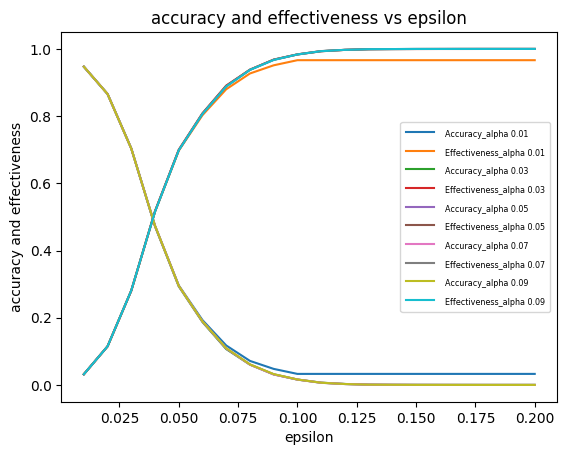

In [54]:
adversarial_predictions_pgd, adversarial_accuracies_pgd, chosen_attacks_pgd, chosen_predictions_pgd = PGD_attack(FC_model, X_test, y_test, [0.01, 0.05, 0.09999999999999999])

- As we can see in the above plot for epsilon and alpha in the intervals [0.01, 0.2] and [0.01, 0.1] respectively, by increasing epsilon, the accuracy of the model decreases while the effectiveness of attack increases.


- Also, till epsilon approaches 0.05, there are no differences in accuracies and effectiveness for different alpha values. However, after epsilon reaches 0.05, for each constant epsilon, as alpha increases, the rate of improvement in model accuracy increases for a while and after that, it remains constant, while the effectiveness of the attack increases within this interval(As the alpha increases, attacks are preforming better.).

#### Adversarial data
In the current section we plot the PGD attacked images for the chosen epsilons 0.01, 0.05, and 0.1

- In the samples below we can see:
    1. The predicted labels
    2. Precentage of confidence predicting the label
    3. The alpha
    4. Whether the predicted label is correct or not(green or red).

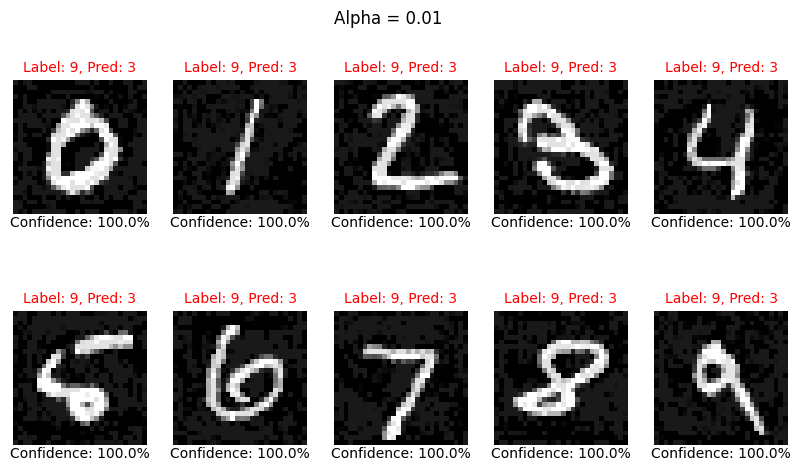

----------------------------------------------------------------------------------------------------


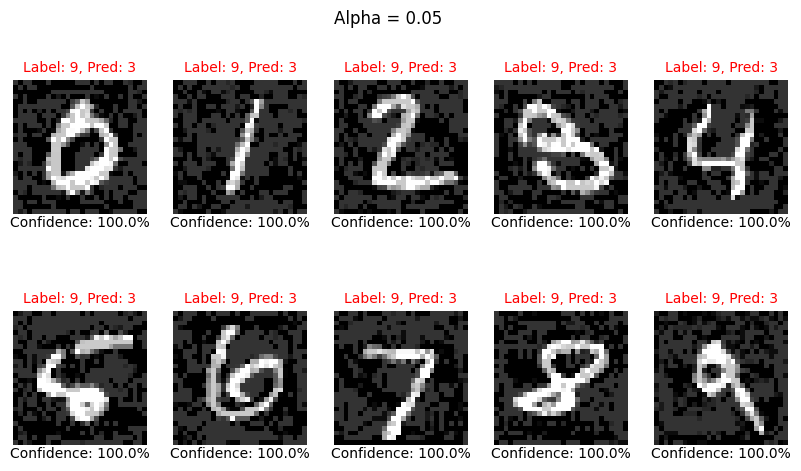

----------------------------------------------------------------------------------------------------


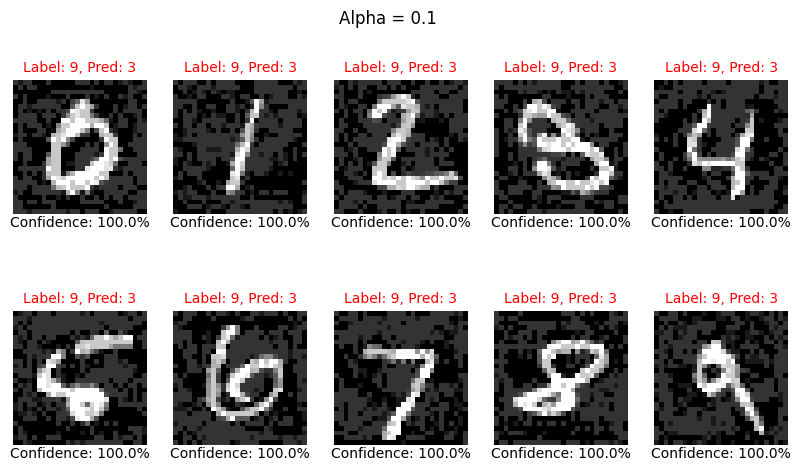

In [59]:
test_images_pgd = []

indices_pgd = [9, 99, 199]
chosen_alphas = [0.01, 0.05, 0.1]
attack_ind = 19

# epsilon == 0.2 is considered
for j in indices_pgd:
    for i in range(number_of_classes):

        sample = chosen_attacks_pgd[attack_ind][chosen_indices[i]].numpy().reshape(28, 28)
        test_images_pgd.append(sample)

    fig, axes = plt.subplots(2, len(test_images_pgd)//2, figsize=(10, 5))
    fig.subplots_adjust(hspace=0.5)

    for k, ax in enumerate(axes.flat):
        ax.imshow(test_images_pgd[k], cmap='gray')
        ax.set_title(f"Label: {i}, Pred: {np.argmax(adversarial_predictions_pgd[j][chosen_indices[i]])}",
                     color='green' if np.argmax(adversarial_predictions_pgd[j][chosen_indices[i]]) == i else 'red',
                     fontsize=10)
        ax.text(0.5, -0.1, f'Confidence: {round(max(adversarial_predictions_pgd[j][chosen_indices[i]])*100, 2)}%',
                transform=ax.transAxes, ha='center', fontsize=10)
        ax.axis('off')

    fig.suptitle(f"Alpha = {chosen_alphas[indices_pgd.index(j)]}", x=0.5, y=1, fontsize=12)
    plt.show()

    if indices_pgd.index(j) != 2:
        print("-"*100)

    test_images_pgd.clear()
    test_images_pgd = []
    attack_ind += 20



<hr>
<he>


According to the above images, we can once again conclude that as alpha increases, the model accuracy decreases and the attack effectiveness increases. Although the confidence is high, the model predictions on adversarial data are almost always wrong.

### Differences between FGSM and PGD attacks

Both FGSM and PGD attacks are adversarial attack techniques used to create adversarial examples for fooling machine learning models. Although they work almost similarly, they have some differences in implementation and functionality. Here are some of the differences:

1. FGSM is a one-step attack method which uses the sign of the gradient, while
PGD is an iterative method which performs multiple steps of gradient descent algorithm.
2. FGSM makes some small changes in images which may not very effective againts defensive measures. On the other hand, PGD explores a wider range of perturbations and creates amore potent adversarial examples.
3. PGD has a stronger robustness compared to FGSM because of it's iteravie nature.
4. FGSM is computationally efficient while PGD is more expensive and it needs more resources. But, the results of PGD is more effective in generating adversarial examples. Thus, we face a trade-off here!

### Reson of using PGD attack

We use PGD attacks to fool the AI model. Also, it is a powerful tool for testing and improving models' robustness.

#### The superiority of PGD over FGSM

1. While PGD demands more computational resources, its robustness and adaptability make it the preferred choice for challenging machine learning models.
2. Adversarial examples crafted using PGD often have higher transferability, meaning they can fool a wider range of models trained on similar tasks.


A notable point is that in the FGSM model, the attack's effectiveness approaches 1 when epsilon exceeds 0.1, whereas in PGD, using an iterative method, this occurs before epsilon reaches 0.1 for all alpha values.